
There are 4 questions, with points weighting given in the question. Write Python code to solve each question.

Points will be deducted for 

- Functions or classes without `docstrings`
- Grossly inefficient or redundant code
- Excessively verbose code
- Use of *magic* numbers

Partial credit may be given for incomplete or wrong answers but not if you do not attempt the question.

You should only have this notebook tab open during the exam and stay on the same notebook throughout. You may use built-in help, accessed via `?foo`, `foo?` or `help(foo)`.

**IMPORTANT**

- This is a **open book** exam meant to evaluate fluency with linear algebra and optimization Python
- Use a stopwatch to record the time you took to complete the exam in the cell below **honestly**:
    - Under 2 hours - No penalty
    - Between 2-3 hours - 5 points penalty
    - More than 3 hours or **no time reported** - 10 points penalty
- Upload the notebook to Sakai when done

**Honor Code**: You agree to follow the Duke Honor code when taking this exam.

**Self-reported time taken**: It is your responsibility to time your exam.

<font color=red>Fill in total time in hours and minutes in the cell below</font>

**1**. (20 points)

In school, to help remember when the spelling should be "ei" or "ie", students are often taught the rule "i before e except after c". For example, "piece" and "conceive" fit this rule.

- Find all occurrences of words in the book `alice.txt` that violate this rule (10 points)
- Make a table of how often each such word occurs in decreasing order of the count (10 points)

In [1]:
import string
import re

alice = open('alice.txt').read()
words = alice.lower().translate(
    str.maketrans('','', string.punctuation)).split()
hits = [word for word in words 
        if 'ie'  in word or 'ei' in word]
anomalies = list(set([word for word in hits
                      if 'cie' in word or
                      re.search(r'[a-b,d-z]ei', word)]))

In [2]:
import pandas as pd

counts = []
for anomaly in anomalies:
    counts.append(hits.count(anomaly))
df = pd.DataFrame(dict(word=anomalies, count=counts))
df.sort_values('count', ascending=False)

,word,count
7,their,10
2,height,4
5,neither,2
6,being,2
0,seeing,1
1,fireirons,1
3,seebeing,1
4,fancied,1
8,theirs,1


**2**. (20 points)

A grayscale figure of a Mandelbrot set is loaded for you.

- Compress the figure by reconstructing a rank k version, where is k is the number of singular values > 1e-9 (5 points)
- Calculate the Frobenius norm of the difference between the original and reconstructed image (5 points)
- Calculate the number of bytes needed to store the original image and the data needed to reconstruct the rank k image (5 points)
- What is the dimension of the null space of the reconstructed rank k image? (5 points)

In [3]:
from skimage import color, io
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = color.rgb2gray(color.rgba2rgb(io.imread('mandelbrot-250x250.png')))

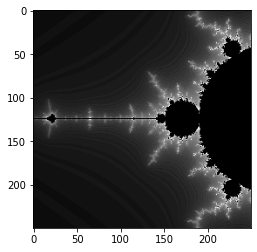

In [5]:
plt.imshow(img, cmap='gray')
pass

In [6]:
import numpy as np
import scipy.linalg as la

In [7]:
U, Σ, Vt = la.svd(img, full_matrices=False)

In [8]:
U.shape, Σ.shape, Vt.shape

((250, 250), (250,), (250, 250))

In [9]:
k = sum(Σ > 1e-9)
img_k = U[:, :k] @ np.diag(Σ[:k]) @ Vt[:k, :]

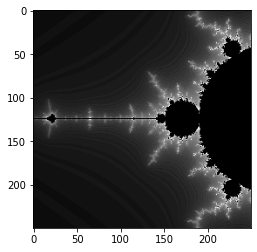

In [10]:
plt.imshow(img_k, cmap='gray')
pass

In [11]:
la.norm(img_k - img, 'fro')

1.616569943732705e-13

In [12]:
img.nbytes

500000

In [31]:
U[:, :k].nbytes + Σ[:k].nbytes + Vt[:k, :].nbytes

549096

In [14]:
img_k.shape[1] - k

113

**3**. (20 points)

Let the columns of $A$ represent the basis vectors for a plane  in $\mathbb{R}^3$

$$
A = \pmatrix{1 & 2\\2 & 3\\3 & 4}
$$

- Construct a matrix $P$ that projects a vector $v \in \mathbb{R}^3$ onto this plane (5 points)
- Find the vector on the plane that is closes to the vector $\pmatrix{3\\4\\6}$ (5 points)
- Let  $v = \pmatrix{3\\4\\6}$. Find the coordinates of $\text{proj}_A v$ with respect to the basis vectors of the plane (5 points)
- Find the distance between $\text{proj}_A v$ and $v$ using projection (5 points)

In [15]:
A = np.array([[1,2], [2,3], [3,4]])

In [16]:
P = A@la.inv(A.T@A)@A.T

In [17]:
P

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

In [18]:
v = np.array([[3,4,6]]).T

In [19]:
P@v

array([[2.83333333],
       [4.33333333],
       [5.83333333]])

In [20]:
la.solve(A.T@A, A.T@v)

array([[0.16666667],
       [1.33333333]])

In [21]:
la.norm((np.eye(3)-P)@v)

0.40824829046384487

**4** (30 points)

Given the function $f(x) = x^3 - 5x^2 + x + 1$,

- Perform a single quadratic interpolation starting with the points (0, 2, 5) and return the next bracket (10 points)
- Plot the function and the quadratic interpolation showing the interpolated points for $x \in (-1, 6)$ (5 points)
- Find a local minimum using the newton method starting at the point x=4 with a tolerance of $10^{-4}$ for $\delta x$. Return the value of $x$ and $f(x)$ at that point (10 points)
- Find all roots of the function using the companion matrix method (5 points)

For the optimization problems, stop when a tolerance of $10^{-4}$ is reached for $x$. Do not use any library functions from `scipy.optimize` or `scipy.interpolate` or `np.root` (you can use for checking but not for solving)

In [22]:
f = lambda x: x**3 - 5*x**2 + x + 1
A = np.array([[1, 0, 0], [1, 2, 4], [1, 5, 25]])
y = f(np.array([0, 2, 5])).reshape(3,1)
sol = la.solve(A, y).ravel()

In [32]:
A

array([[ 1,  0,  0],
       [ 1,  2,  4],
       [ 1,  5, 25]])

In [23]:
-sol[1]/(2*sol[2])

2.25

Next bracket is (2, 2.25, 5)

In [24]:
g = lambda x: sol[2]*x**2 + sol[1]*x + sol[0]

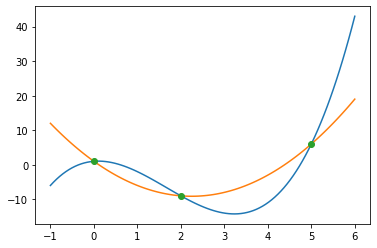

In [25]:
xs = np.linspace(-1, 6, 100)
f = lambda x: x**3 - 5*x**2+ x + 1
plt.plot(xs, f(xs))
plt.plot(xs, g(xs))
plt.plot([0,2,5], y, 'o')
pass

In [26]:
def f1(x):
    """First derivative."""
    return 3*x**2 - 10*x + 1

def f2(x):
    """Second derivative."""
    return 6*x - 10

def newton(x, f, f1, f2, xtol=1e-4):
    """Newton's method."""
    
    delta_x = 1
    while delta_x > xtol:
        xnew = x - f1(x)/f2(x)
        delta_x = np.abs(x - xnew)
        x = xnew
    return x, f(x)

In [27]:
newton(4, f, f1, f2)

(3.230138586624651, -14.236233090082624)

In [28]:
C = np.array([
    [0, 0, -1],
    [1, 0, -1],
    [0, 1, 5]
])

In [29]:
np.real(la.eigvals(C))

array([-0.34889422,  0.60406814,  4.74482608])

Check

In [30]:
np.roots([1,-5,1,1])

array([ 4.74482608,  0.60406814, -0.34889422])